In [1]:
import os
import csv
import numpy as np
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt

from sturdr.utils.results import *
from sturdr.utils.coordinates import ecef2lla
from sturdr.utils.constants import GPS_L1CA_CODE_FREQ, GPS_L1CA_CARRIER_FREQ, LIGHT_SPEED

LAMBDA = LIGHT_SPEED / GPS_L1CA_CARRIER_FREQ
BETA = LIGHT_SPEED / GPS_L1CA_CODE_FREQ

path = Path('..')

{'State': <class 'str'>, 'CodeLock': <class 'bool'>, 'CarrierLock': <class 'bool'>, 'DataLock': <class 'bool'>, 'Ephemeris': <class 'bool'>, 'Week': <class 'float'>, 'ToW': <class 'float'>, 'CNo': <class 'float'>, 'Doppler': <class 'float'>, 'CodePhase': <class 'float'>, 'CarrierPhase': <class 'float'>, 'IP': <class 'float'>, 'QP': <class 'float'>, 'IE': <class 'float'>, 'QE': <class 'float'>, 'IL': <class 'float'>, 'QL': <class 'float'>, 'IP_1': <class 'float'>, 'QP_1': <class 'float'>, 'IP_2': <class 'float'>, 'QP_2': <class 'float'>}
-339.54604945909006
90.80774683504926
-682.3286798466958
-623.6554805382439
-955.1819704345432
65.21275325918333
-287.74948742882185


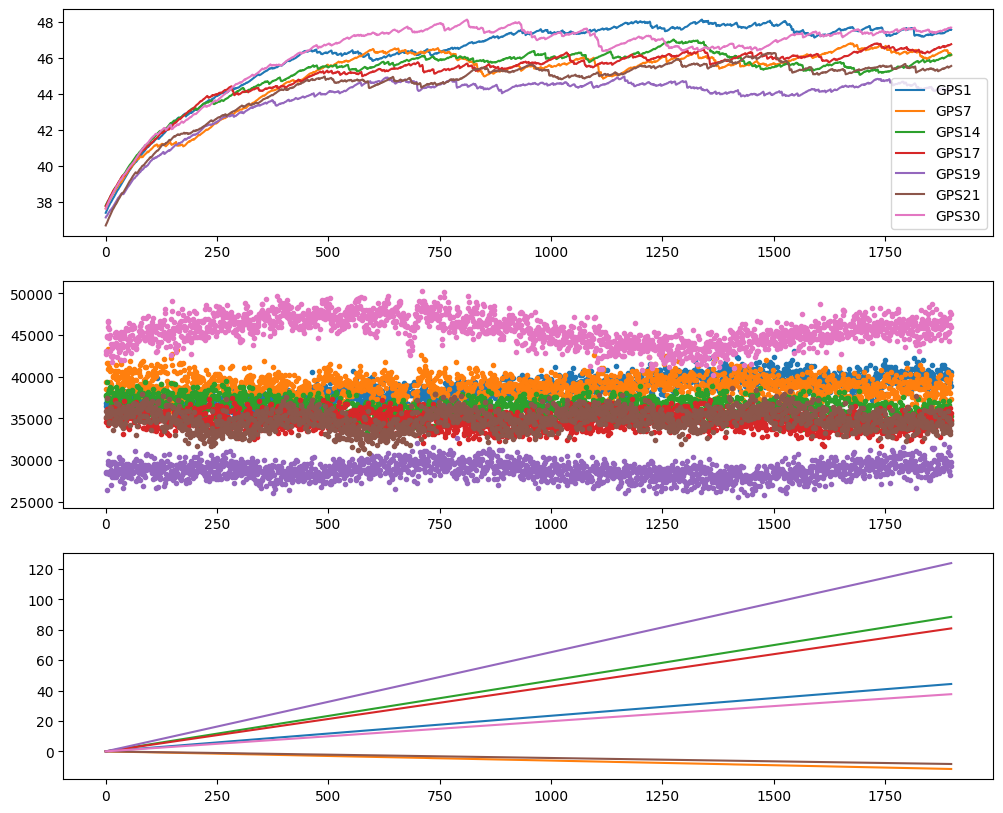

In [2]:
filename = path / "results" / "GPS_L1CA_TEST_ChannelStatus.csv"
results = ParseChannelResults(filename)
# pprint(results[0]['DataLock'])

f, ax = plt.subplots(3,1,figsize=(12,10))
for i in results.keys():
    ax[0].plot(results[i]['CNo'][100:], label=results[i]['ID'])
    ax[1].plot([np.sqrt(x**2 + y**2) for x,y in zip(results[i]['IP'][100:], results[i]['QP'][100:])], '.', label=results[i]['ID'])
    ax[2].plot(np.asarray(results[i]['CodePhase'][100:])-results[i]['CodePhase'][100], label=results[i]['ID'])
    print(-BETA * np.mean(np.diff(results[i]['CodePhase'][-300:]) / np.diff(results[i]['ToW'][-300:])))
ax[0].legend()

In [3]:
filename = path / "results" / "GPS_L1CA_TEST_Navigation.csv"
results = ParseNavigationResults(filename)
print(results)

lla = np.asarray([ecef2lla([x,y,z]) for x,y,z in zip(results['x'], results['y'], results['z'])])
print(f"{np.array2string(lla, precision=10, separator=',')}")

{'GpsWeek': [205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0, 205.0], 'GpsToW': [413658.94, 413659.94, 413660.94, 413661.94, 413662.94, 413663.94, 413664.94, 413665.94], 'x': [422592.65762169036, 422594.40211247414, 422597.2758960035, 422596.4892054342, 422598.7364167637, 422596.72743203025, 422594.26447224896, 422590.2290284455], 'y': [-5362876.761567638, -5362876.43356171, -5362878.053040461, -5362876.44763855, -5362883.836113997, -5362883.96649911, -5362876.2644953625, -5362870.937857678], 'z': [3415505.138014165, 3415501.4634570554, 3415505.0298895976, 3415505.1306018396, 3415508.576758534, 3415509.3096043873, 3415508.7352821096, 3415506.3568131737], 'vx': [0.001736961677324976, 0.012622226049374402, 0.014920780141722115, 0.0069396719380679425, 0.010861424842130048, 0.016415346222589906, -0.006589389573743049, 0.0058403250488770755], 'vy': [-0.014845575019114134, -0.015481223232015465, 0.013185792240630925, -0.021349729193405907, -0.02066057050586346, -0.02949057213783362, -0.02623